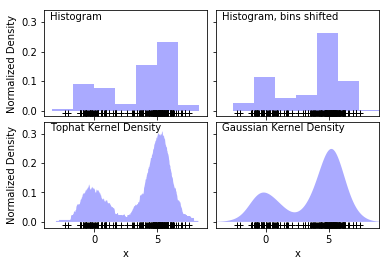

In [26]:
#coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, 3 * N), np.random.normal(5, 1, 7 * N)))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# 直方图 1 'Histogram'
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', normed=True)
ax[0, 0].text(-3.5, 0.31, 'Histogram')

# 直方图 2 'Histogram, bins shifted'
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', normed=True)
ax[0, 1].text(-3.5, 0.31, 'Histogram, bins shifted')

# 核密度估计 1 'tophat KDE'
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, 'Tophat Kernel Density')

# 核密度估计 2 'Gaussian KDE'
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, 'Gaussian Kernel Density')
for axi in ax.ravel():
    axi.plot(X[:, 0], np.zeros(X.shape[0]) - 0.01, '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)
for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')
for axi in ax[1, :]:
    axi.set_xlabel('x')
plt.show()

In [27]:
from sklearn.neighbors import kde
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kde = kde.KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
print(kde.score_samples(X))
print(np.exp(kde.score_samples(X)))

[-0.41075698 -0.41075698 -0.41076071 -0.41075698 -0.41075698 -0.41076071]
[0.66314807 0.66314807 0.6631456  0.66314807 0.66314807 0.6631456 ]
